In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
# Good old pandas and numpy
import pandas as pd
import numpy as np
from hyperopt import hp

# Unfortunately I'm still using matplotlib for graphs
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def objective(x):
    """Objective function to minimize"""
    
    # Create the polynomial object
    f = np.poly1d([1, -2, -28, 28, 12, -26, 100])

    # Return the value of the polynomial
    return f(x) * 0.05

In [10]:
objective(3)

-56.95

Minimum of -219.8012 occurs at 4.8779


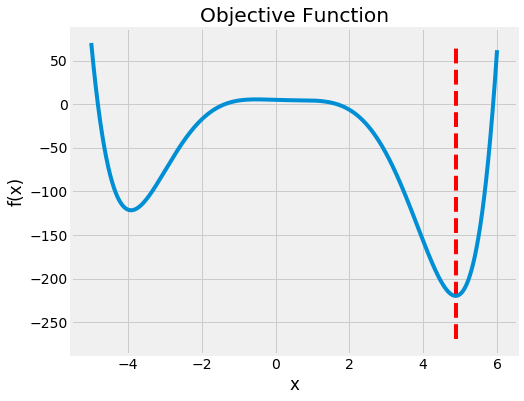

In [11]:
# Space over which to evluate the function is -5 to 6
x = np.linspace(-5, 6, 10000)
y = objective(x)

miny = min(y)
minx = x[np.argmin(y)]

# Visualize the function
plt.figure(figsize = (8, 6))
plt.style.use('fivethirtyeight')
plt.title('Objective Function'); plt.xlabel('x'); plt.ylabel('f(x)')
plt.vlines(minx, min(y)- 50, max(y), linestyles = '--', colors = 'r')
plt.plot(x, y);

# Print out the minimum of the function and value
print('Minimum of %0.4f occurs at %0.4f' % (miny, minx))

In [3]:
from hyperopt import hp

# Create the domain space
space = hp.uniform('x', -5, 6)

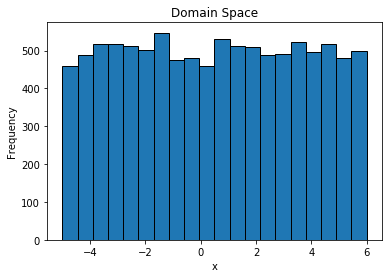

In [4]:
from hyperopt.pyll.stochastic import sample

samples = []
# Sample 10000 values from the range
for _ in range(10000):
    samples.append(sample(space))
    
# Histogram of the values
plt.hist(samples, bins = 20, edgecolor = 'black'); 
plt.xlabel('x'); plt.ylabel('Frequency'); plt.title('Domain Space');

In [5]:

from hyperopt import rand, tpe

# Create the algorithms
tpe_algo = tpe.suggest
rand_algo = rand.suggest

In [7]:
from hyperopt import Trials

# Create two trials objects
tpe_trials = Trials()
rand_trials = Trials()

In [12]:
from hyperopt import fmin

# Run 2000 evals with the tpe algorithm
tpe_best = fmin(fn=objective, space=space, algo=tpe_algo, trials=tpe_trials, 
                max_evals=2000, rstate= np.random.RandomState(50))

print(tpe_best)

# Run 2000 evals with the random algorithm
rand_best = fmin(fn=objective, space=space, algo=rand_algo, trials=rand_trials, 
                 max_evals=2000, rstate= np.random.RandomState(50))

100%|██████████| 2000/2000 [00:15<00:00, 128.60it/s, best loss: -219.80118811219114]
{'x': 4.878481851906148}
100%|██████████| 2000/2000 [00:03<00:00, 621.84it/s, best loss: -219.80116907646868]


In [13]:
# Print out information about losses
print('Minimum loss attained with TPE:    {:.4f}'.format(tpe_trials.best_trial['result']['loss']))
print('Minimum loss attained with random: {:.4f}'.format(rand_trials.best_trial['result']['loss']))
print('Actual minimum of f(x):            {:.4f}'.format(miny))

# Print out information about number of trials
print('\nNumber of trials needed to attain minimum with TPE:    {}'.format(tpe_trials.best_trial['misc']['idxs']['x'][0]))
print('Number of trials needed to attain minimum with random: {}'.format(rand_trials.best_trial['misc']['idxs']['x'][0]))

# Print out information about value of x
print('\nBest value of x from TPE:    {:.4f}'.format(tpe_best['x']))
print('Best value of x from random: {:.4f}'.format(rand_best['x']))
print('Actual best value of x:      {:.4f}'.format(minx))

Minimum loss attained with TPE:    -219.8012
Minimum loss attained with random: -219.8012
Actual minimum of f(x):            -219.8012

Number of trials needed to attain minimum with TPE:    655
Number of trials needed to attain minimum with random: 235

Best value of x from TPE:    4.8785
Best value of x from random: 4.8776
Actual best value of x:      4.8779


In [14]:
%%timeit -n 3
# Run 2000 evals with the tpe algorithm
best = fmin(fn=objective, space=space, algo=tpe_algo, max_evals=200)

100%|██████████| 200/200 [00:00<00:00, 397.22it/s, best loss: -219.79824635676306]
475 ms ± 15.5 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [15]:
%%timeit -n 3

# Run 2000 evals with the random algorithm
best = fmin(fn=objective, space=space, algo=rand_algo, max_evals=200)

100%|██████████| 200/200 [00:00<00:00, 2151.26it/s, best loss: -219.80120396015965]
99.4 ms ± 4.12 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [16]:

tpe_results = pd.DataFrame({'loss': [x['loss'] for x in tpe_trials.results], 'iteration': tpe_trials.idxs_vals[0]['x'],
                            'x': tpe_trials.idxs_vals[1]['x']})
                            
tpe_results.head()

,loss,iteration,x
0,36.210073,0,5.957885
1,-202.384052,1,4.470885
2,-75.519449,2,3.218963
3,5.543552,3,-0.515859
4,35.078011,4,-4.916832


In [17]:
tpe_results['rolling_average_x'] = tpe_results['x'].rolling(50).mean().fillna(method = 'bfill')
tpe_results['rolling_average_loss'] = tpe_results['loss'].rolling(50).mean().fillna(method = 'bfill')
tpe_results.head()

,loss,iteration,x,rolling_average_x,rolling_average_loss
0,36.210073,0,5.957885,2.105103,-74.393795
1,-202.384052,1,4.470885,2.105103,-74.393795
2,-75.519449,2,3.218963,2.105103,-74.393795
3,5.543552,3,-0.515859,2.105103,-74.393795
4,35.078011,4,-4.916832,2.105103,-74.393795


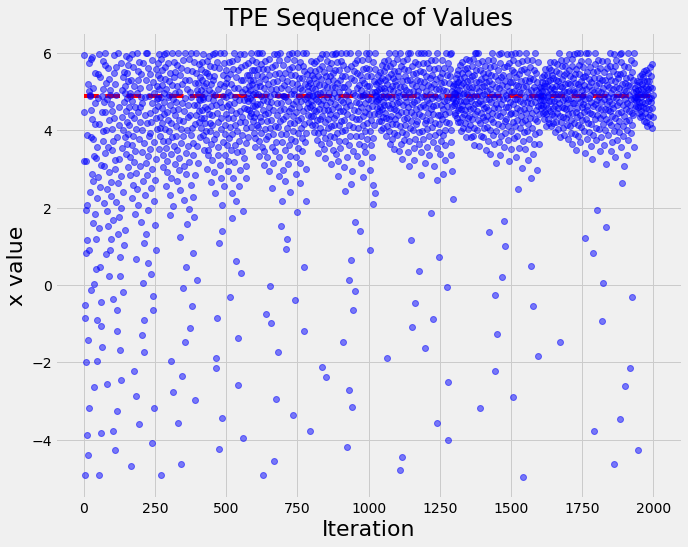

In [18]:
plt.figure(figsize = (10, 8))
plt.plot(tpe_results['iteration'], tpe_results['x'],  'bo', alpha = 0.5);
plt.xlabel('Iteration', size = 22); plt.ylabel('x value', size = 22); plt.title('TPE Sequence of Values', size = 24);
plt.hlines(minx, 0, 2000, linestyles = '--', colors = 'r');

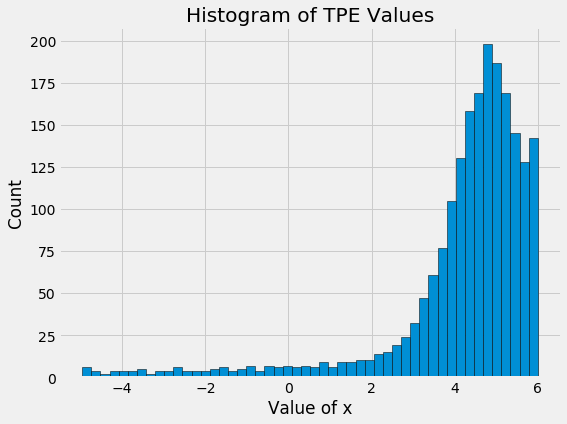

In [19]:
plt.figure(figsize = (8, 6))
plt.hist(tpe_results['x'], bins = 50, edgecolor = 'k');
plt.title('Histogram of TPE Values'); plt.xlabel('Value of x'); plt.ylabel('Count');


In [20]:

hyperparameter_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_depth': [2, 5, 10, 15, 20, 25, 30, 35, 40],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]
}

In [22]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Function mapping hyperparameters to a real-valued scpre
def objective(hyperparameters):
    
    # Machine learning model
    rf = RandomForestRegressor(**hyperparameters)
    
    # Training 
    rf.fit(X_train, y_train)
    
    # Making predictions and evaluating
    predictions = rf.predict(X_valid)
    rmse = np.sqrt(np.mean(np.square(prediction - y_valid)))
    
    return rmse

ImportError: dlopen(/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise_fast.cpython-37m-darwin.so, 2): Library not loaded: @rpath/libgfortran.3.dylib
  Referenced from: /anaconda3/lib/libcblas.3.dylib
  Reason: image not found